<a href="https://colab.research.google.com/github/Sripriya07/-Deep-Learning-Computer-Vision---Sripriya-Arabala-/blob/master/%3CDeep_Learning_Computer_Vision%3E_%3CSripriya_Arabala%3E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget http://download.tensorflow.org/example_images/flower_photos.tgz

--2019-08-18 06:44:49--  http://download.tensorflow.org/example_images/flower_photos.tgz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.20.128, 2607:f8b0:400e:c07::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.20.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228813984 (218M) [application/x-compressed-tar]
Saving to: ‘flower_photos.tgz.1’

flower_photos.tgz.1 100%[===================>] 218.21M  80.7MB/s    in 2.7s    

2019-08-18 06:44:57 (80.7 MB/s) - ‘flower_photos.tgz.1’ saved [228813984/228813984]



In [0]:
!tar -xzf flower_photos.tgz.1 

In [7]:
!unzip flower_images.zip

Archive:  flower_images.zip
   creating: flower_images/
  inflating: flower_images/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/flower_images/
  inflating: __MACOSX/flower_images/._.DS_Store  
   creating: flower_images/.ipynb_checkpoints/
  inflating: flower_images/0001.png  
  inflating: __MACOSX/flower_images/._0001.png  
  inflating: flower_images/0002.png  
  inflating: __MACOSX/flower_images/._0002.png  
  inflating: flower_images/0003.png  
  inflating: __MACOSX/flower_images/._0003.png  
  inflating: flower_images/0004.png  
  inflating: __MACOSX/flower_images/._0004.png  
  inflating: flower_images/0005.png  
  inflating: __MACOSX/flower_images/._0005.png  
  inflating: flower_images/0006.png  
  inflating: __MACOSX/flower_images/._0006.png  
  inflating: flower_images/0007.png  
  inflating: __MACOSX/flower_images/._0007.png  
  inflating: flower_images/0008.png  
  inflating: __MACOSX/flower_images/._0008.png  
  inflating: flower_images/0009.png  
  inflating: _

In [0]:
import cv2                         #image and video processing library
import numpy as np                 #mathematical library used for numerical computation
import pandas as pd                #for data manipulation and analysis

import matplotlib.pyplot as plt    #used for plotting images,graphs,charts etc
%matplotlib inline

import os                          #python package for accessing computer and file system
import random                      #to create random numbers for shuffled data
import gc                          #garbage collector to clean deleted data from memory

In [0]:
train_dir='/content/flower_photos/daisy'
train_cat1=['/content/flower_photos/daisy/{}'.format(i) for i in os.listdir(train_dir)]


In [0]:
train_dir1='/content/flower_photos/dandelion'
train_cat2=['/content/flower_photos/dandelion/{}'.format(i) for i in os.listdir(train_dir1)]

In [0]:
train_imgs=train_cat1[:]+train_cat2[:]

In [0]:
test_dir='/content/flower_images'
test_imgs=['/content/flower_images/{}'.format(i) for i in os.listdir(test_dir)]

In [0]:
random.shuffle(train_imgs)

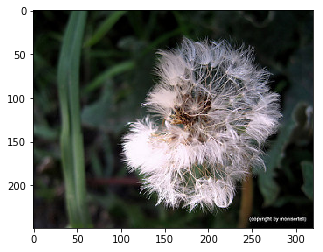

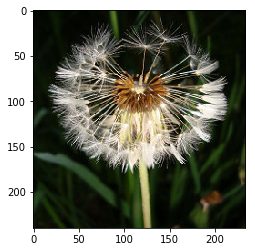

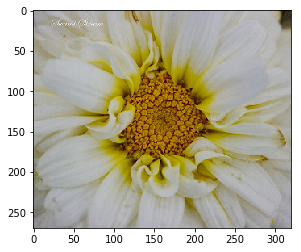

In [14]:
import matplotlib.image as mpimg   #import plotting module from matplotlib for plotting first three images
for img in train_imgs[0:3]:
    img=mpimg.imread(img)
    imgplot=plt.imshow(img)
    plt.show()

In [0]:
#Declaring image dimensions 
nrows=150
ncolumns=150
channels=3

In [0]:
import sys
from PIL import Image

#defining function which read and process image to an acceptable format for our model
def read_and_process_image1(list_of_images):
    X=[]  #Images
    y=[]  #labels
    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(image,cv2.IMREAD_COLOR),(nrows,ncolumns),interpolation=cv2.INTER_CUBIC))
        #reading the images

        
        
        #def calculate_brightness(image):
        greyscale_image = Image.open(image).convert('L')
        histogram = greyscale_image.histogram()
        pixels = sum(histogram)
        brightness = scale = len(histogram)

        for index in range(0, scale):
            ratio = histogram[index] / pixels
            brightness += ratio * (-scale + index)
                
        if brightness==255:
                y.append(1)
        else:
                y.append(brightness/scale)
                
        
        
    return X,y

In [0]:
X,y=read_and_process_image1(train_imgs)

In [61]:
X[0]

array([[[ 1,  0,  0],
        [ 0,  1,  2],
        [ 2,  4,  4],
        ...,
        [ 4, 10,  5],
        [10, 16,  9],
        [14, 19, 10]],

       [[ 1,  1,  1],
        [ 0,  4,  3],
        [ 0,  2,  2],
        ...,
        [ 4, 10,  5],
        [14, 18, 11],
        [20, 25, 16]],

       [[ 3,  7,  3],
        [ 2,  7,  5],
        [ 0,  2,  2],
        ...,
        [ 9, 13,  8],
        [17, 22, 15],
        [24, 28, 19]],

       ...,

       [[38, 32, 33],
        [50, 39, 41],
        [51, 41, 43],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[35, 29, 28],
        [49, 38, 38],
        [52, 41, 41],
        ...,
        [ 0,  0,  0],
        [ 2,  2,  2],
        [ 0,  0,  0]],

       [[34, 26, 26],
        [45, 33, 35],
        [47, 38, 39],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

In [62]:
y

[0.27885134287148633,
 0.24441043169070537,
 0.6107306586371529,
 0.44429093127076336,
 0.2555089319029854,
 0.5318531290690106,
 0.47037586805555476,
 0.9129120614035079,
 0.3228748786878882,
 0.4950591362847221,
 0.2801777415031939,
 0.3494188125163441,
 0.21685932807807798,
 0.1833234970674485,
 0.1616745297041473,
 0.5545754504504502,
 0.561166572822823,
 0.3120105657003016,
 0.4395457254129132,
 0.42525425711077836,
 0.7201304365948933,
 0.17377460186298047,
 0.25974777221679674,
 0.35055042827560295,
 0.49659520467122387,
 0.3256883748372397,
 0.4572973882299265,
 0.25904490344929265,
 0.2475552271021021,
 0.31870737143393385,
 0.13256437687687697,
 0.4748569115990994,
 0.552989305360487,
 0.315189870198568,
 0.4021117770522392,
 0.365264118893046,
 0.28492289806547605,
 0.21607997841591592,
 0.611217973456325,
 0.3951891072591141,
 0.3725669383195857,
 0.18921248592342343,
 0.4922460135159918,
 0.37213696509008987,
 0.24379422169811268,
 0.4500466870704473,
 0.11356203731001036,

In [0]:
y_new = [ '%.2f' % elem for elem in y ]

In [0]:
y_new=[i*10 for i in y]

In [0]:
y_new=[round(i) for i in y_new]

In [105]:
y_new

[3,
 2,
 6,
 4,
 3,
 5,
 5,
 9,
 3,
 5,
 3,
 3,
 2,
 2,
 2,
 6,
 6,
 3,
 4,
 4,
 7,
 2,
 3,
 4,
 5,
 3,
 5,
 3,
 2,
 3,
 1,
 5,
 6,
 3,
 4,
 4,
 3,
 2,
 6,
 4,
 4,
 2,
 5,
 4,
 2,
 4,
 1,
 3,
 3,
 4,
 3,
 3,
 7,
 3,
 4,
 3,
 5,
 3,
 5,
 4,
 3,
 5,
 4,
 5,
 1,
 5,
 2,
 4,
 6,
 6,
 6,
 3,
 3,
 5,
 5,
 4,
 5,
 3,
 2,
 6,
 3,
 4,
 5,
 7,
 7,
 4,
 4,
 5,
 3,
 4,
 3,
 4,
 5,
 3,
 4,
 9,
 3,
 3,
 5,
 5,
 7,
 5,
 7,
 5,
 5,
 6,
 4,
 3,
 2,
 4,
 2,
 5,
 5,
 9,
 2,
 6,
 5,
 6,
 4,
 3,
 4,
 6,
 4,
 3,
 6,
 5,
 4,
 4,
 5,
 3,
 6,
 3,
 4,
 3,
 4,
 4,
 3,
 5,
 4,
 4,
 3,
 3,
 6,
 6,
 4,
 5,
 3,
 5,
 5,
 5,
 3,
 5,
 3,
 6,
 3,
 2,
 4,
 6,
 3,
 3,
 4,
 4,
 5,
 5,
 4,
 4,
 4,
 8,
 5,
 4,
 4,
 4,
 3,
 3,
 4,
 4,
 6,
 6,
 5,
 5,
 4,
 6,
 5,
 4,
 5,
 4,
 6,
 4,
 4,
 5,
 4,
 5,
 4,
 3,
 5,
 4,
 5,
 3,
 4,
 3,
 5,
 4,
 4,
 5,
 7,
 6,
 2,
 4,
 3,
 3,
 4,
 7,
 5,
 4,
 3,
 3,
 5,
 4,
 2,
 4,
 4,
 2,
 6,
 4,
 3,
 3,
 4,
 5,
 4,
 3,
 5,
 4,
 3,
 6,
 5,
 3,
 5,
 4,
 7,
 2,
 4,
 1,
 5,
 4,
 4,
 5,
 4,
 5,
 4,
 2,


In [136]:
import numpy as np
np.unique(y_new)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

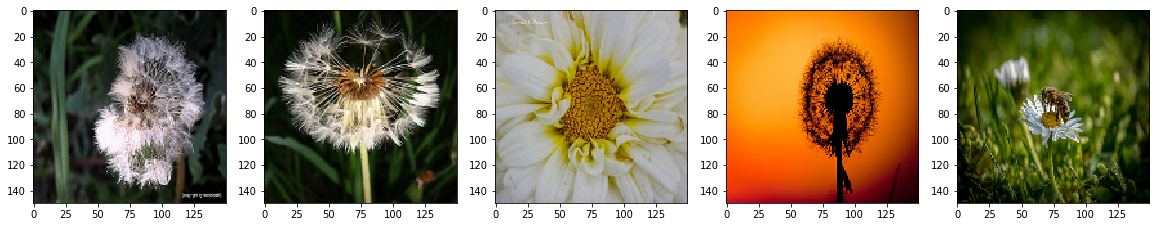

In [100]:

plt.figure(figsize=(20,10))
columns=5
for i in range(columns):
    plt.subplot(5/columns+1,columns,i+1)
    X[i]= cv2.cvtColor(X[i], cv2.COLOR_RGB2BGR)
    plt.imshow(X[i])

Text(0.5, 1.0, 'Labels')

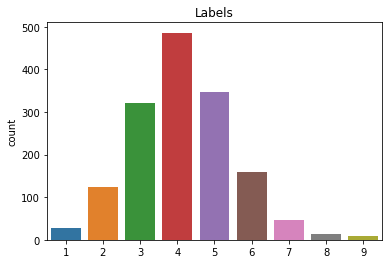

In [137]:
import seaborn as sns       #plotting package

X=np.array(X)               #X and y are of type list and now convert to numpy array
y_new=np.array(y_new)

sns.countplot(y_new)
plt.title('Labels')

In [138]:
#printing shapes
print("shape of train images is :",X.shape)
print("Shape of labels is :",y_new.shape)

shape of train images is : (1531, 150, 150, 3)
Shape of labels is : (1531,)


In [139]:
#using sklearn to split the data for trianing and testing.
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y_new,test_size=0.2,random_state=2)


print("shape of train images is :",X_train.shape)
print("shape of validation images is :",X_val.shape)
print("shape of labels is :",y_train.shape)
print("shape of labels is :",y_val.shape)

shape of train images is : (1224, 150, 150, 3)
shape of validation images is : (307, 150, 150, 3)
shape of labels is : (1224,)
shape of labels is : (307,)


In [0]:
#getting the length of train and validation data
ntrain=len(X_train)
nval=len(X_val)

batch_size=32

In [109]:
#importing necessary keras modules
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array,load_img


Using TensorFlow backend.


In [0]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [141]:
model.summary() #printing model summary

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [0]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [0]:
# create the augmentation configuration.
#This helps prevent overfitting since we are using a small dataset
train_datagen=ImageDataGenerator(rescale=1./255,  #scale the image between 0 and 1
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)   

val_datagen=ImageDataGenerator(rescale=1./255)  #Do not augment validation data,perform only resclae.

In [0]:
#create the image generators
train_generator=train_datagen.flow(X_train,y_train,batch_size=batch_size)
val_generator=val_datagen.flow(X_val,y_val,batch_size=batch_size)

In [151]:
history=model.fit_generator(train_generator,steps_per_epoch=ntrain,epochs=5,validation_data=val_generator,validation_steps=nval)

Epoch 1/5
1224/1224 [==============================] - 2070s 2s/step - loss: 1.0655 - acc: 0.5420 - val_loss: 1.3422 - val_acc: 0.3880
Epoch 2/5
1224/1224 [==============================] - 2087s 2s/step - loss: 0.7948 - acc: 0.6531 - val_loss: 0.5778 - val_acc: 0.7879
Epoch 3/5
1224/1224 [==============================] - 2063s 2s/step - loss: 0.7191 - acc: 0.6905 - val_loss: 0.6140 - val_acc: 0.7148
Epoch 4/5
  59/1224 [>.............................] - ETA: 30:42 - loss: 0.6816 - acc: 0.6965

KeyboardInterrupt: ignored

In [0]:
#Predict on the first 10 images of the Test set
 
X_test,y_test=read_and_process_image(test_imgs[0:10]) 
x=np.array(X_test)
test_datagen=ImageDataGenerator(rescale=1./255)

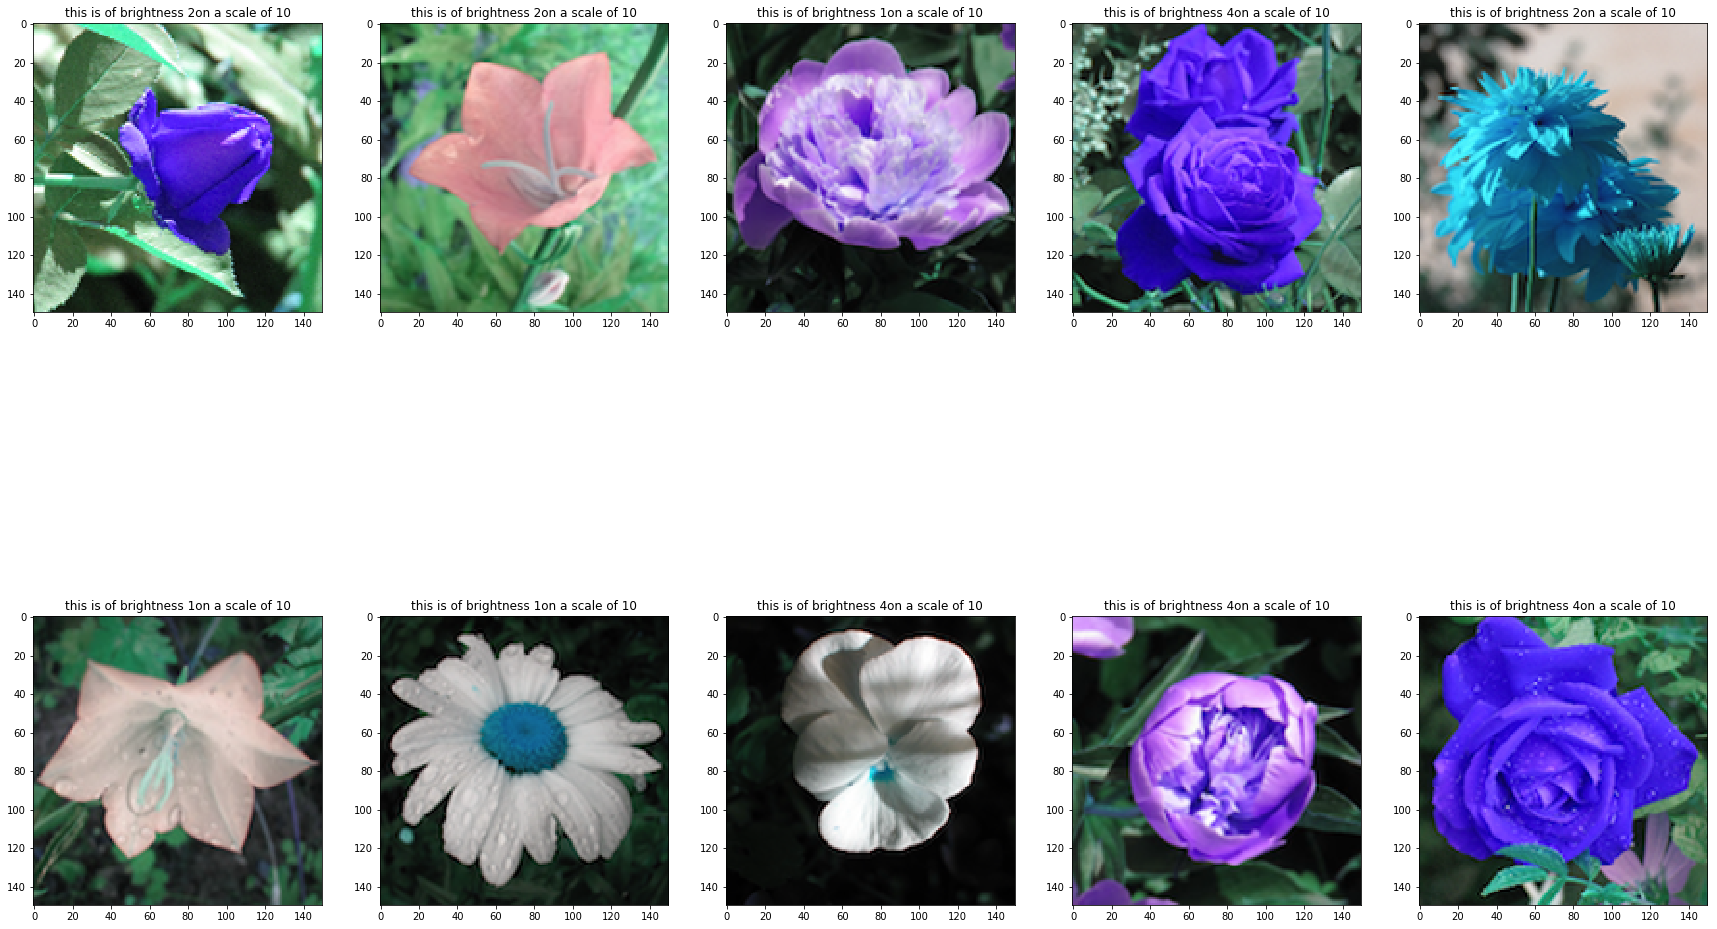

In [160]:
#Predicting the test Images
i=0
text_labels=[]
plt.figure(figsize=(30,20))
for batch in test_datagen.flow(x,batch_size=1):
    pred=model.predict(batch)
    #print(pred)
    pred1=np.argmax(pred)                  #returns index of the maximum probability in prediction numpy array
    #print(pred1)
    if pred1==0:
        text_labels.append('1')
    elif pred1==1:
        text_labels.append('2')
    elif pred1==2:
        text_labels.append('3')
    elif pred1==3:
        text_labels.append('4')
    elif pred1==4:
        text_labels.append('1')
    elif pred1==5:
        text_labels.append('2')
    elif pred1==6:
        text_labels.append('3')
    elif pred1==7:
        text_labels.append('4')
    elif pred1==8:
        text_labels.append('1')
    elif pred1==9:
        text_labels.append('2')
    plt.subplot(5/columns+1,columns,i+1)
    plt.title("this is of brightness "+text_labels[i] + "on a scale of 10")
    imgplot=plt.imshow(batch[0])
    i+=1
    if i%10 == 0:
        break

plt.show()